In [ ]:
# STARBUCKS ÜRÜNLERİ BESİN DEĞERLERİ VE ML İLE DOĞRLUK ANALİZİ

In [262]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline


In [263]:
df=pd.read_csv("starbucks.csv")
df.head()

,Unnamed: 0,item,calories,fat,carb,fiber,protein,type
0,1,8-Grain Roll,350,8.0,67,5,10,bakery
1,2,Apple Bran Muffin,350,9.0,64,7,6,bakery
2,3,Apple Fritter,420,20.0,59,0,5,bakery
3,4,Banana Nut Loaf,490,19.0,75,4,7,bakery
4,5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery


In [264]:
sns.set_style("darkgrid")

In [265]:
df.tail()

,Unnamed: 0,item,calories,fat,carb,fiber,protein,type
72,73,Tarragon Chicken Salad Sandwich,420,13.0,46,6,32,sandwich
73,74,Turkey & Swiss Sandwich,390,13.0,36,2,34,sandwich
74,75,Greek Yogurt Honey Parfait,300,12.0,44,0,8,parfait
75,76,Peach Raspberry Yogurt Parfait,300,4.0,57,3,10,parfait
76,77,Strawberry & Blueberry Yogurt Parfait,300,3.5,60,3,7,parfait


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  77 non-null     int64  
 1   item        77 non-null     object 
 2   calories    77 non-null     int64  
 3   fat         77 non-null     float64
 4   carb        77 non-null     int64  
 5   fiber       77 non-null     int64  
 6   protein     77 non-null     int64  
 7   type        77 non-null     object 
dtypes: float64(1), int64(5), object(2)
memory usage: 4.9+ KB


In [267]:
df.describe()

,Unnamed: 0,calories,fat,carb,fiber,protein
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,39.000000,338.831169,13.766234,44.870130,2.220779,9.480519
std,22.371857,105.368701,7.095488,16.551634,2.112764,8.079556
min,1.000000,80.000000,0.000000,16.000000,0.000000,0.000000
25%,20.000000,300.000000,9.000000,31.000000,0.000000,5.000000
50%,39.000000,350.000000,13.000000,45.000000,2.000000,7.000000
75%,58.000000,420.000000,18.000000,59.000000,4.000000,15.000000
max,77.000000,500.000000,28.000000,80.000000,7.000000,34.000000


In [268]:
df.isnull().sum()

Unnamed: 0    0
item          0
calories      0
fat           0
carb          0
fiber         0
protein       0
type          0
dtype: int64

In [269]:
df.shape

(77, 8)

In [270]:
df.head()

,Unnamed: 0,item,calories,fat,carb,fiber,protein,type
0,1,8-Grain Roll,350,8.0,67,5,10,bakery
1,2,Apple Bran Muffin,350,9.0,64,7,6,bakery
2,3,Apple Fritter,420,20.0,59,0,5,bakery
3,4,Banana Nut Loaf,490,19.0,75,4,7,bakery
4,5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery


In [271]:
df.groupby("type")["item"].count()


type
bakery           41
bistro box        8
hot breakfast     8
parfait           3
petite            9
salad             1
sandwich          7
Name: item, dtype: int64

In [272]:
df["type"].nunique()

7

In [273]:
df.type


0       bakery
1       bakery
2       bakery
3       bakery
4       bakery
        ...   
72    sandwich
73    sandwich
74     parfait
75     parfait
76     parfait
Name: type, Length: 77, dtype: object

In [274]:
df["type"].unique()

array(['bakery', 'bistro box', 'petite', 'hot breakfast', 'salad',
       'sandwich', 'parfait'], dtype=object)

In [275]:
df['type'].value_counts()

bakery           41
petite            9
bistro box        8
hot breakfast     8
sandwich          7
parfait           3
salad             1
Name: type, dtype: int64

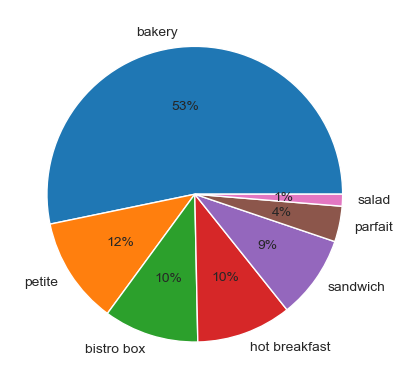

In [276]:
plt.pie(x=df['type'].value_counts(), labels=['bakery','petite','bistro box','hot breakfast ','sandwich','parfait','salad'],autopct='%1.f%%');

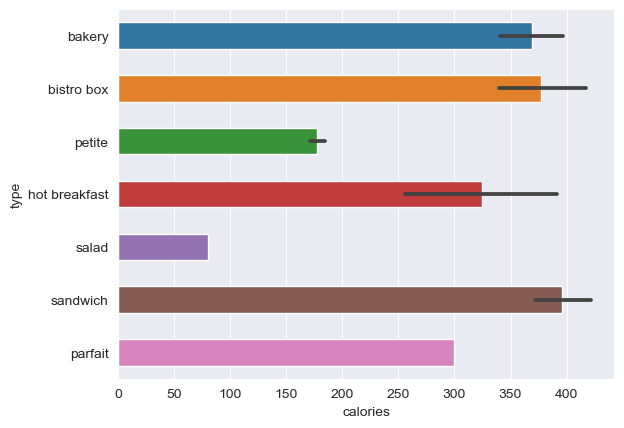

In [277]:
sns.barplot(x=df['calories'],y=df['type'],width=0.5);


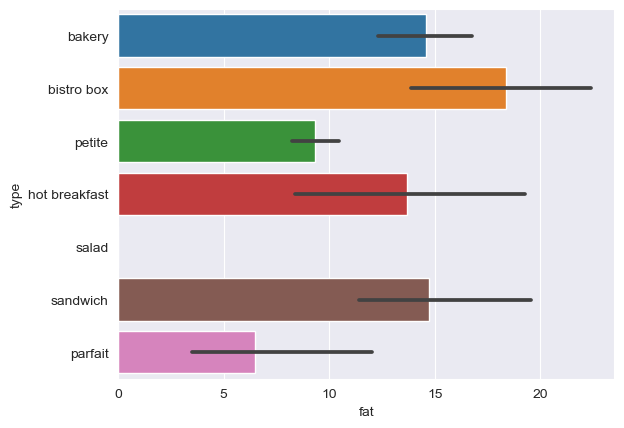

In [278]:
sns.barplot(x=df['fat'],y=df['type']);

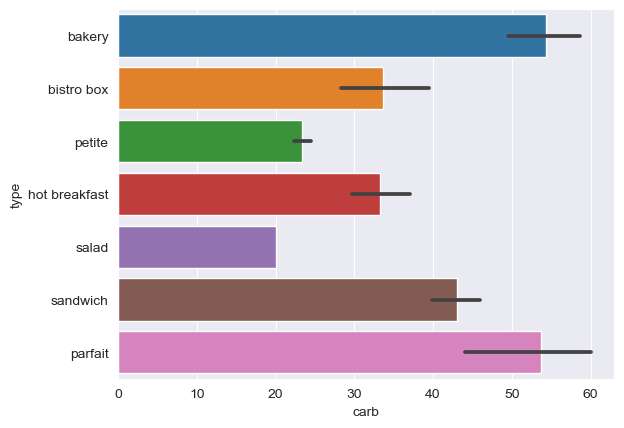

In [279]:
sns.barplot(x=df['carb'],y=df['type']);

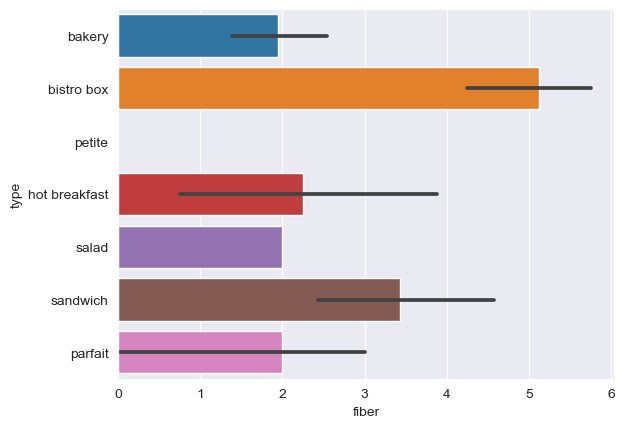

In [280]:
sns.barplot(x=df['fiber'],y=df['type']);

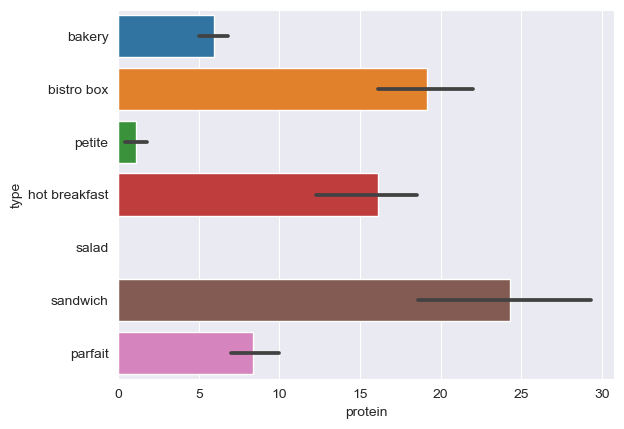

In [281]:
sns.barplot(x=df['protein'],y=df['type']);

In [282]:
numeric_columns = df.select_dtypes(include='number')
corr_matrix = numeric_columns.corr()


In [283]:
df.head()

,Unnamed: 0,item,calories,fat,carb,fiber,protein,type
0,1,8-Grain Roll,350,8.0,67,5,10,bakery
1,2,Apple Bran Muffin,350,9.0,64,7,6,bakery
2,3,Apple Fritter,420,20.0,59,0,5,bakery
3,4,Banana Nut Loaf,490,19.0,75,4,7,bakery
4,5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery


In [284]:
item_values = df["item"].unique()
item_values


array(['8-Grain Roll', 'Apple Bran Muffin', 'Apple Fritter',
       'Banana Nut Loaf', 'Birthday Cake Mini Doughnut',
       'Blueberry Oat Bar', 'Blueberry Scone',
       'Bountiful Blueberry Muffin', 'Butter Croissant ', 'Cheese Danish',
       'Chocolate Chunk Cookie', 'Chocolate Cinnamon Bread',
       'Chocolate Croissant', 'Chocolate Old-Fashioned Doughnut',
       'Chonga Bagel', 'Cinnamon Chip Scone', 'Cranberry Orange Scone',
       'Double Chocolate Brownie', 'Double Fudge Mini Doughnut',
       'Everything with Cheese Bagel', 'Ginger Molasses Cookie',
       'Iced Lemon Pound Cake', 'Mallorca Sweet Bread',
       'Maple Oat Pecan Scone ', 'Marble Pound Cake',
       'Marshmallow Dream Bar', 'Morning Bun', 'Multigrain Bagel',
       'Old-Fashioned Glazed Doughnut', 'Outrageous Oatmeal Cookie',
       'Petite Vanilla Bean Scone', 'Plain Bagel', 'Pumpkin Bread',
       'Pumpkin Scone ', 'Raspberry Scone', 'Raspberry Swirl Pound Cake',
       'Reduced-Fat Banana Chocolate Chip C

In [285]:
import matplotlib.pyplot as plt


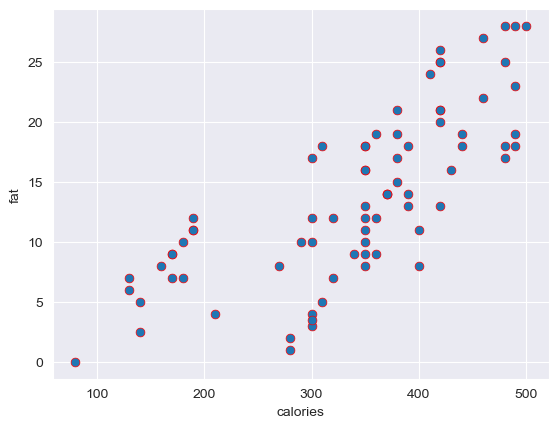

In [286]:
sns.scatterplot(x="calories", y="fat", data=df, s=40, edgecolor="red");


In [287]:
df.corr()

/var/folders/_b/1x9hj_s15m1c7h3jnj7x41mh0000gn/T/ipykernel_12482/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,calories,fat,carb,fiber,protein
Unnamed: 0,1.000000,-0.219922,-0.174856,-0.405229,0.050665,0.448922
calories,-0.219922,1.000000,0.758682,0.674999,0.260645,0.410398
fat,-0.174856,0.758682,1.000000,0.144547,-0.028549,0.223470
carb,-0.405229,0.674999,0.144547,1.000000,0.213044,-0.050789
fiber,0.050665,0.260645,-0.028549,0.213044,1.000000,0.488564
protein,0.448922,0.410398,0.223470,-0.050789,0.488564,1.000000


/var/folders/_b/1x9hj_s15m1c7h3jnj7x41mh0000gn/T/ipykernel_12482/2264866656.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True);


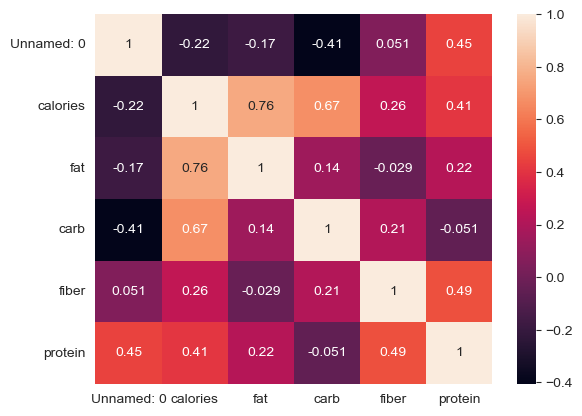

In [288]:
sns.heatmap(df.corr(),annot=True);

'kalori ve yağ'

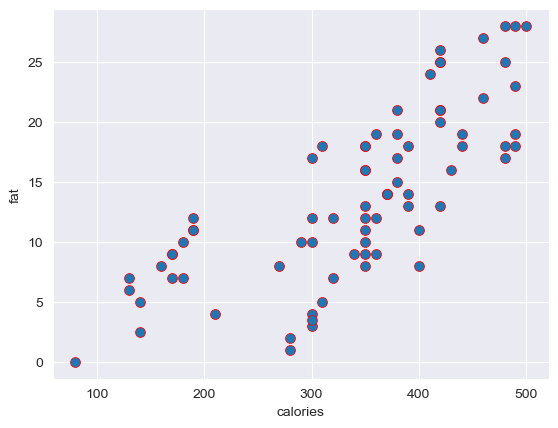

In [293]:
sns.scatterplot(x="calories",y="fat",data=df,s=50,edgecolor="red");
"kalori ve yağ"


'yiyecek içecek kalori dağılımı'

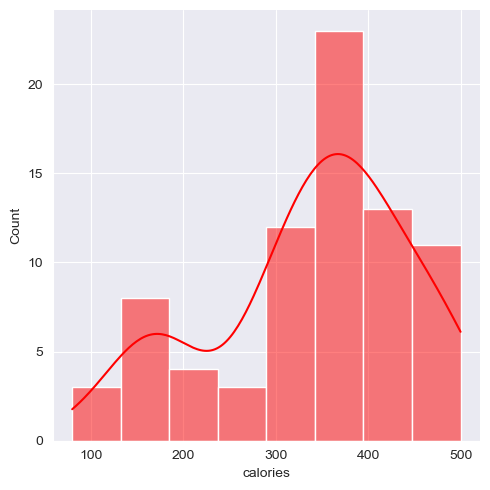

In [294]:

sns.displot(x="calories",data=df,color="red",kde=True);
"yiyecek içecek kalori dağılımı"

'protein grafiği'

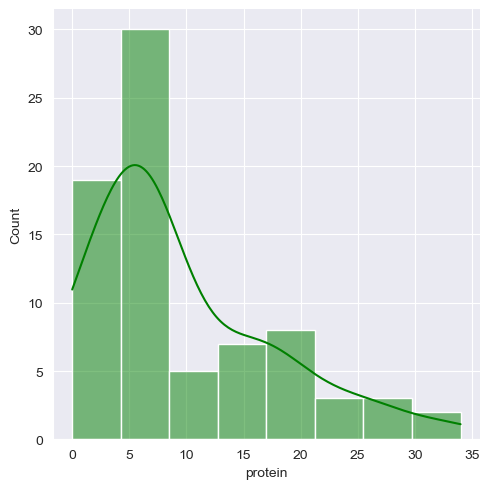

In [296]:
sns.displot(x="protein",data=df,color="green",kde=True);
"protein grafiği"


'yağ grafiği'

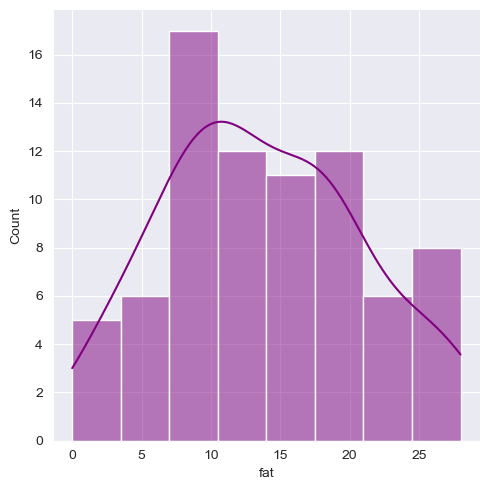

In [297]:
sns.displot(x="fat",data=df,color="purple",kde=True);
"yağ grafiği"

'Lif Grafiği'

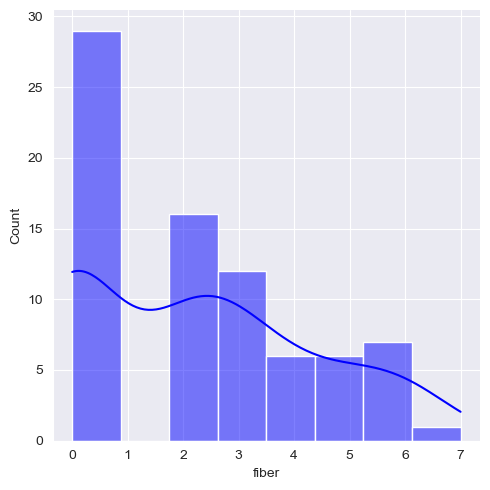

In [298]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(x="fiber", data=df, color="blue", kde=True)
"Lif Grafiği"




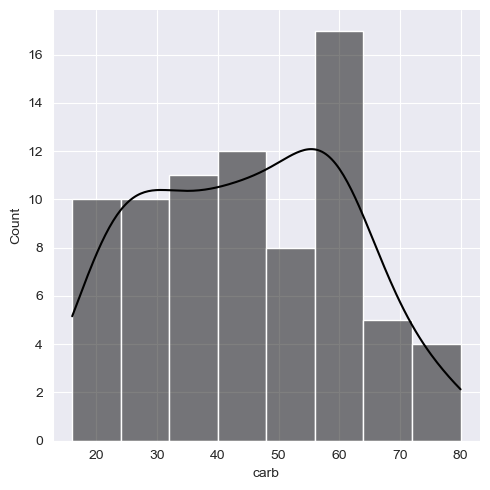

In [257]:
sns.displot(x="carb",data=df,color="blacK",kde=True);
plt.title=("karbonhidrat grafiği")
plt.show()

In [236]:
df.head()

,Unnamed: 0,item,calories,fat,carb,fiber,protein,type
0,1,8-Grain Roll,350,8.0,67,5,10,bakery
1,2,Apple Bran Muffin,350,9.0,64,7,6,bakery
2,3,Apple Fritter,420,20.0,59,0,5,bakery
3,4,Banana Nut Loaf,490,19.0,75,4,7,bakery
4,5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery


# BİR ÜRÜNÜN HANGI KATEGORIYE AIT OLDUGUNU TAHMIN EDECEZ 

# DECISION TREE CLASSIFY KULLANRAK BIR URUNUN HANGI TYPE A SAHIP OLDUGUNU TAHMIN EDECEZ BUNU YAPARKEN CALORİ, FAT ,CARB, FİBER, PROTEIN  DEGERLERINE DIKAT EDEREK YAPACAZ

In [237]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [238]:
x=df[["calories","fat","carb","fiber","protein"]]
y=df["type"]

In [239]:
x

,calories,fat,carb,fiber,protein
0,350,8.0,67,5,10
1,350,9.0,64,7,6
2,420,20.0,59,0,5
3,490,19.0,75,4,7
4,130,6.0,17,0,0
...,...,...,...,...,...
72,420,13.0,46,6,32
73,390,13.0,36,2,34
74,300,12.0,44,0,8
75,300,4.0,57,3,10


In [300]:
y

0       bakery
1       bakery
2       bakery
3       bakery
4       bakery
        ...   
72    sandwich
73    sandwich
74     parfait
75     parfait
76     parfait
Name: type, Length: 77, dtype: object

In [241]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [242]:
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)     # modelimizi eğittik

DecisionTreeClassifier()

In [243]:
y_pred=model.predict(xtest)

In [244]:
accuracy=accuracy_score(ytest,y_pred)

In [245]:
print("doğruluk",accuracy)

doğruluk 0.6875


In [246]:
df

,Unnamed: 0,item,calories,fat,carb,fiber,protein,type
0,1,8-Grain Roll,350,8.0,67,5,10,bakery
1,2,Apple Bran Muffin,350,9.0,64,7,6,bakery
2,3,Apple Fritter,420,20.0,59,0,5,bakery
3,4,Banana Nut Loaf,490,19.0,75,4,7,bakery
4,5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery
...,...,...,...,...,...,...,...,...
72,73,Tarragon Chicken Salad Sandwich,420,13.0,46,6,32,sandwich
73,74,Turkey & Swiss Sandwich,390,13.0,36,2,34,sandwich
74,75,Greek Yogurt Honey Parfait,300,12.0,44,0,8,parfait
75,76,Peach Raspberry Yogurt Parfait,300,4.0,57,3,10,parfait


In [247]:
prediction=model.predict([[ 300,3.5,60,3,7]])

/Users/basar/anaconda3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [248]:
print(prediction)

['parfait']


In [249]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree 

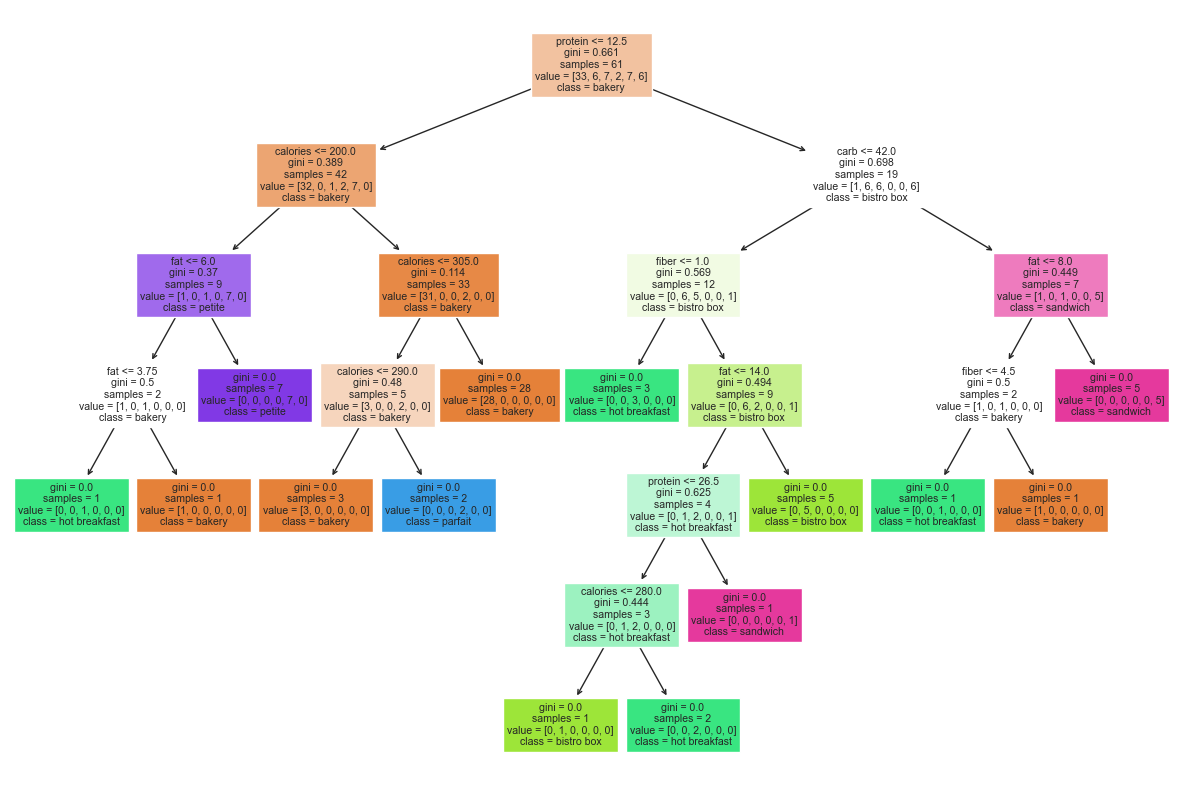

In [250]:
plt.figure(figsize=(15,10))
plot_tree(model,feature_names=x.columns,class_names=model.classes_,filled=True)
plt.show()